In [18]:
%matplotlib notebook
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from fridge import Fridge
from tes import TES
from QET import QET
from detector import Detector
from PD4 import PD4
from electronics import Electronics
from absorber import Absorber
from simulated_noise import simulate_noise
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from MaterialProperties import TESMaterial

In [19]:
printing = False 
fSnolab = Fridge("SNOLAB", 20e-3, 145e-3, 900e-3, 4.8, 0)
# Absorber: Silicon. Height 1mm. Radius 38.1mm. W safety 3mm. 
absorber = Absorber("Si", "cylinder", 1e-3, 38.1e-3, 3e-3, printing) # same as matlab
eSnolab = Electronics(fSnolab, fSnolab.get_TCP(), fSnolab.get_TMC())
eSLAC = Electronics(fSnolab, fSnolab.get_TMC(), fSnolab.get_TMC(), 5e-3, 6e-3, 25e-9, 25e-9, 4e-12)

tungsten = TESMaterial()

In [24]:
#PD2 ~Upgrade~ input values 
tes_l = 140e-6 # same as matlab
tes_w = 2.5e-6 # this is what we want, Fabrication is questionable (PD2 turned out to be 3.5)
# standard tes width we can do at Stanford: 2.5um (Matt will check)
# at TAMU tes width can do 3 um 
#foverlap = 1.2 # same as matlab (why greater than 1??)
#foverlap = 0.8 # same as matlab (why greater than 1??)
n_fin = 6
#l_fin = 200e-6 # same as matlab
h_fin = 600e-9 # same as matlab
h_fin = 900e-9 # same as matlab
sigma = tungsten._gPep_v
T_eq = -100
res_n = 200e-3 # want 100 mOhm 
l_overlaps = [4e-6, 6e-6, 8e-6, 10e-6, 12e-6, 14e-6, 16e-6, 18e-6, 20e-6, 22e-6,24e-6, 30e-6] # radius of fin connector
l_fins = [ 100e-6,  125e-6, 150e-6,175e-6, 200e-6, 225e-6]
l_fins_mu = []
l_overlaps_mu = []
for l_o in l_overlaps:
    l_overlaps_mu.append(l_o*(10**6))
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))

<IPython.core.display.Javascript object>


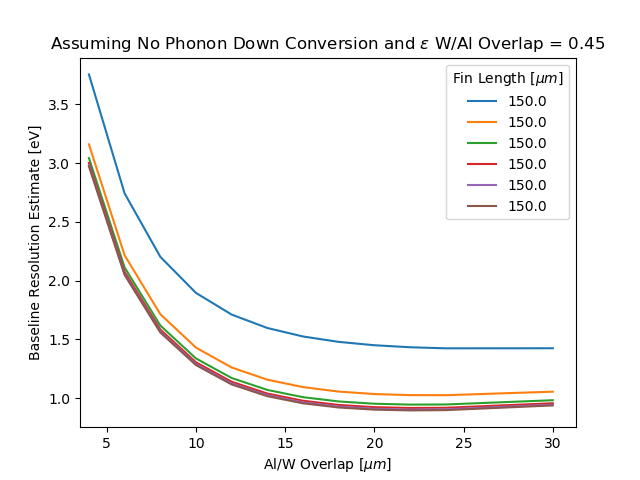

Fin Length              0.00015
Overlap                 1e-05
Percent Active SA       0.0067753759239401554
Percent Passive SA      0.001755444110750273
Percent QP Absorb SA    0.008530820034690429
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.17151440278170366
Phonon Absorption Time  5.0172290914965525e-05
Time ETF                6.666815483629353e-05
~~BASE RESOLUTION~~     1.8944343164926003
Fin Length              0.00015
Overlap                 2e-05
Percent Active SA       0.0067753759239401554
Percent Passive SA      0.001755444110750273
Percent QP Absorb SA    0.008530820034690429
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.3400807186996023
Phonon Absorption Time  5.0172290914965525e-05
Time ETF                6.666815483629355e-05
~~BASE RESOLUTION~~     1.4491779491691057
INVALID DESIGN!!!
Fin Length              0.00015
Overlap                 2.4e-05
Percent Active SA  

In [28]:
l_f = 150e-6
h_fins = [200e-9, 400e-9, 600e-9, 800e-9, 1000e-9, 1200e-9]
f, ax = plt.subplots(1)
for h_fin in h_fins:
    print("FIN THICKNESS ", h_fin)
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6 or l_over == 24e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pActiveArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pActiveArea)
            pPassiveArea = det._SA_passive/det._absorber.get_SA()
            print("Percent Passive SA     ", pPassiveArea)
            print("Percent QP Absorb SA   ", det._fSA_qpabsorb)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("~~BASE RESOLUTION~~    ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

## Initial Specs
* $n_{fin} = 6$
* $l_{tes} = 140 \mu m$
* $w_{tes} = 2.5 \mu m$
* $h_{fin} = 600 nm$
* $R_{n} = 200 m\Omega$

<IPython.core.display.Javascript object>


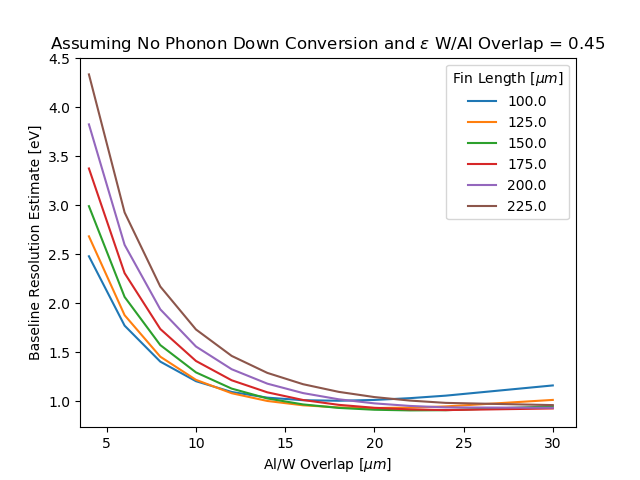

Fin Length              0.00015
Overlap                 1e-05
Percent Active SA       0.0067753759239401554
Percent Passive SA      0.001755444110750273
Percent QP Absorb SA    0.008530820034690429
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.2508899996255984
Phonon Absorption Time  5.0172290914965525e-05
Time ETF                6.666815483629353e-05
~~BASE RESOLUTION~~     1.2950805966251087
Fin Length              0.00015
Overlap                 2e-05
Percent Active SA       0.0067753759239401554
Percent Passive SA      0.001755444110750273
Percent QP Absorb SA    0.008530820034690429
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.5390530722532021
Phonon Absorption Time  5.0172290914965525e-05
Time ETF                6.666815483629355e-05
~~BASE RESOLUTION~~     0.9142652251605226
INVALID DESIGN!!!
Fin Length              0.00015
Overlap                 2.4e-05
Percent Active SA   

In [25]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6 or l_over == 24e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pActiveArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pActiveArea)
            pPassiveArea = det._SA_passive/det._absorber.get_SA()
            print("Percent Passive SA     ", pPassiveArea)
            print("Percent QP Absorb SA   ", det._fSA_qpabsorb)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("~~BASE RESOLUTION~~    ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

<IPython.core.display.Javascript object>


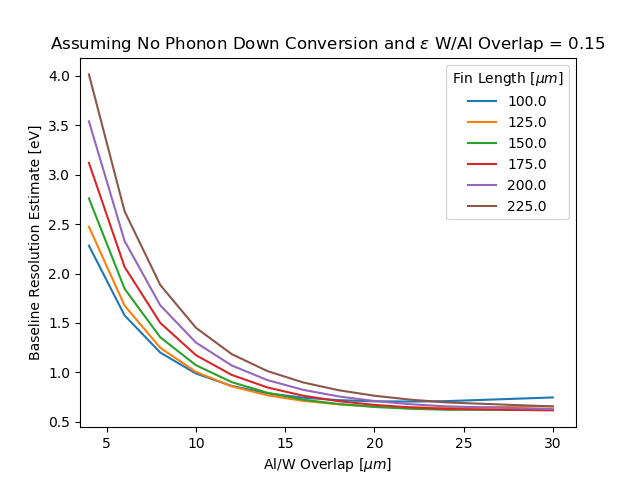

Fin Length              0.00015
Overlap                 1e-05
Percent Active SA       0.0067753759239401554
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.24306248126679825
Phonon Absorption Time  5.0172290914965525e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         1.0733726087182458
Fin Length              0.00015
Overlap                 2e-05
Percent Active SA       0.0067753759239401554
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.5179517507078939
Phonon Absorption Time  5.0172290914965525e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         0.6514108983236633
Fin Length              0.000175
Overlap                 1e-05
Percent Active SA       0.00893804053008365
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.19890600143574386
Phonon Absorption Time  4.006572883193361e-05
Time ETF    

In [5]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.15, tungsten, printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p >perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.15")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

<IPython.core.display.Javascript object>


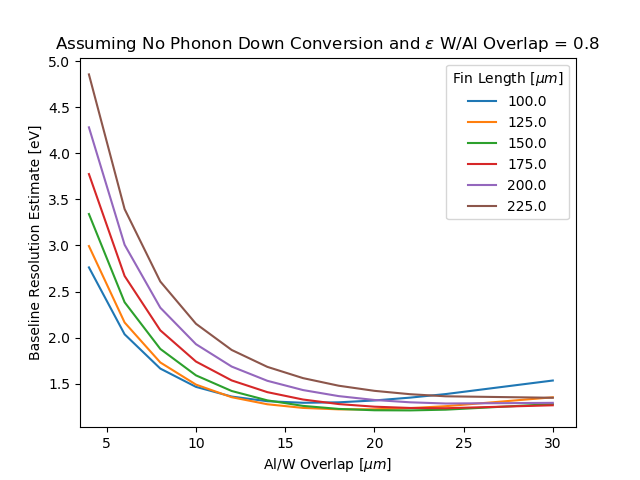

Fin Length              0.00015
Overlap                 1e-05
Percent Active SA       0.0067753759239401554
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.24306248126679825
Phonon Absorption Time  5.0172290914965525e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         1.589868586577603
Fin Length              0.00015
Overlap                 2e-05
Percent Active SA       0.0067753759239401554
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.5179517507078939
Phonon Absorption Time  5.0172290914965525e-05
Time ETF                6.666815483629355e-05
BASE RESOLUTION         1.2110278856100287
Fin Length              0.000175
Overlap                 1e-05
Percent Active SA       0.00893804053008365
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.19890600143574386
Phonon Absorption Time  4.006572883193361e-05
Time ETF     

In [6]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.8, tungsten, printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p >perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.8")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

<IPython.core.display.Javascript object>


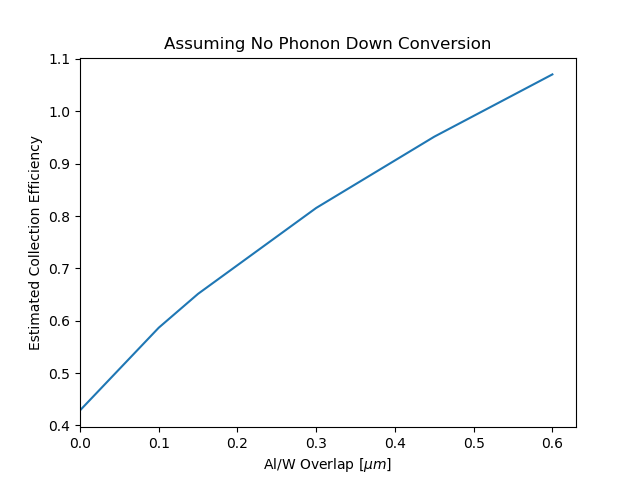

In [7]:
l_f = 150e-6 
l_over = 20e-6

# Check Robustness of Design
effic = [0, .1, .15, .3, .45, .6]
sig = []
f, ax = plt.subplots(1)
for ef in effic:
    tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, ef, tungsten , printing)
    qet = QET( l_f, h_fin, tes)
    det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
    e_res = simulate_noise(det)
    sig.append(e_res)
    fin_string = "{}"
ax.plot(effic, sig )
ax.set_title("Assuming No Phonon Down Conversion")
ax.set_xlim(xmin =0)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Estimated Collection Efficiency")
plt.show()

In [8]:
n_fin = 8
res_n = 200e-3 # want 100 mOhm 

Increase $n_{fin}$ from 6 to 8. But can't have both 8 $20\mu m$ overlap fin connectors *and* $140 \mu m$ long TES.  

<IPython.core.display.Javascript object>


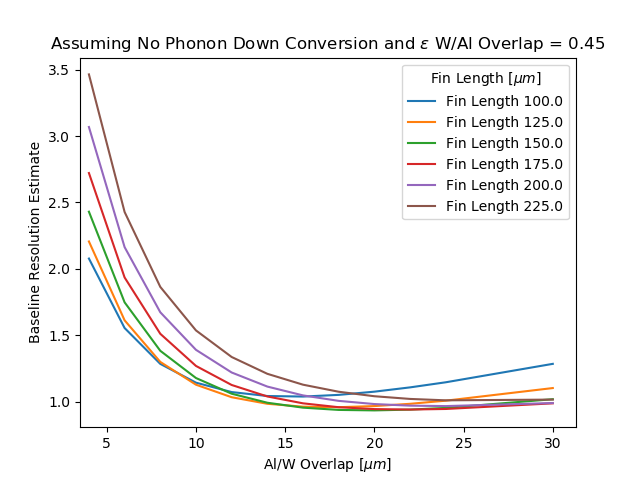

8  Fins
Fin Length              0.00015
Percent Active SA       0.006603070514015667
TES l                   0.00014
overlap                 1e-05
N tes                   672
Rn                      0.19999999999999993
Phonon Absorption Time  5.1206560464167397e-05
Time ETF                6.666815483629355e-05
BASE RESOLUTION         1.1776637037832502
8  Fins
Fin Length              0.00015
Percent Active SA       0.006603070514015667
TES l                   0.00014
overlap                 1.2e-05
N tes                   672
Rn                      0.19999999999999993
Phonon Absorption Time  5.1206560464167397e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         1.0595283566718834
INVALID DESIGN!!!
8  Fins
Fin Length              0.00015
Percent Active SA       0.006603070514015667
TES l                   0.00014
overlap                 2e-05
N tes                   672
Rn                      0.19999999999999993
Phonon Absorption Time  5.1206560464167397e-05
Time

In [9]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if (l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 12e-6 or l_over == 20e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
            print(n_fin, " Fins")
            print("Fin Length             ", l_f)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("TES l                  ", det._tes._l)
            print("overlap                ", l_over)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "Fin Length {}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

In [10]:
n_fin =4
tes_l = 100e-6 

<IPython.core.display.Javascript object>


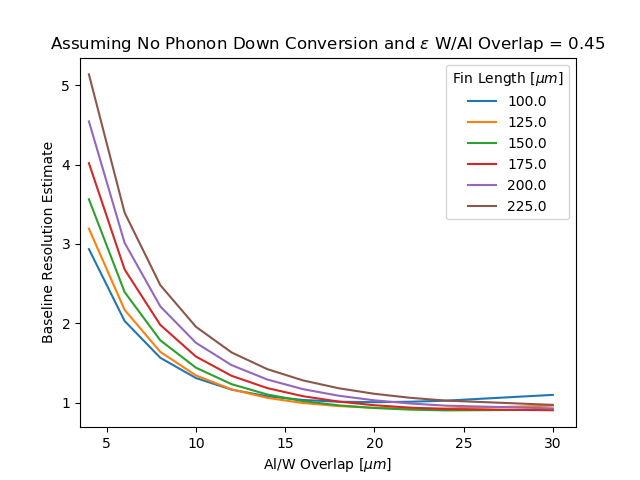

Fin Length                 0.0001
Overlap                    1e-05
-- Percent Active SA       0.0021550427259742102
-- N tes                   480
-- tes length              0.0001
-- Rn                      0.19999999999999998
-- Phonon Absorption Time  0.00011508814514741832
-- Time ETF                6.666815483629353e-05
-- BASE RESOLUTION         1.3105237201432438
Fin Length                 0.0001
Overlap                    1.2e-05
-- Percent Active SA       0.0021550427259742102
-- N tes                   480
-- tes length              0.0001
-- Rn                      0.19999999999999998
-- Phonon Absorption Time  0.00011508814514741832
-- Time ETF                6.666815483629355e-05
-- BASE RESOLUTION         1.1645822214526784
Fin Length                 0.0001
Overlap                    2e-05
-- Percent Active SA       0.0021550427259742102
-- N tes                   480
-- tes length              0.0001
-- Rn                      0.19999999999999998
-- Phonon Absorption Tim

In [11]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps:
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if (l_f == 100e-6 or l_f == 125e-6 or l_f == 150e-6) and (l_over == 10e-6 or l_over == 12e-6 or l_over == 20e-6) :
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
            print("Fin Length                ", l_f)
            print("Overlap                   ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- tes length             ", det._tes._l)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

<IPython.core.display.Javascript object>


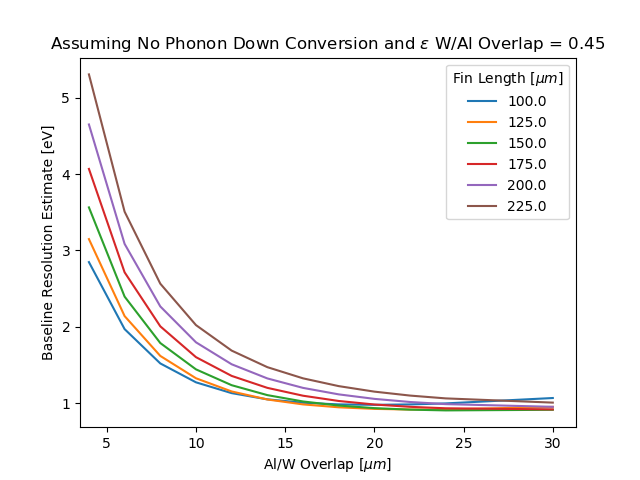

Fin Length                 0.000125
Overlap                    1e-05
-- Percent Active SA       0.004309162701197391
-- N tes                   640
-- tes length              0.0001
-- Rn                      0.14999999999999997
-- Phonon Absorption Time  7.07431388911608e-05
-- Time ETF                7.233904574297787e-05
-- BASE RESOLUTION         1.3245599751949284
Fin Length                 0.000125
Overlap                    1.2e-05
-- Percent Active SA       0.004309162701197391
-- N tes                   640
-- tes length              0.0001
-- Rn                      0.14999999999999997
-- Phonon Absorption Time  7.07431388911608e-05
-- Time ETF                7.233904574297787e-05
-- BASE RESOLUTION         1.1515875994365796
Fin Length                 0.00015
Overlap                    1e-05
-- Percent Active SA       0.006013443737004838
-- N tes                   640
-- tes length              0.0001
-- Rn                      0.14999999999999997
-- Phonon Absorption Time 

In [12]:
res_n = 150e-3 
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps:
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if (l_f == 125e-6 or l_f == 150e-6) and (l_over == 10e-6 or l_over == 12e-6) :
            print("Fin Length                ", l_f)
            print("Overlap                   ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- tes length             ", det._tes._l)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

<IPython.core.display.Javascript object>


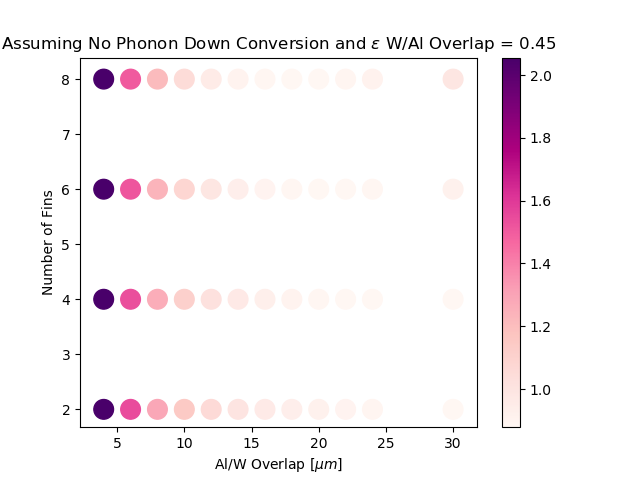

2  FINS
------------------------------------------------
overlap                    2e-05
-- Active Surface Area     4.336693421169301e-05
-- Percent Active SA       0.004633158095556833
-- N tes                   480
-- TES l                   0.0001
-- Rn                      0.19999999999999998
-- Phonon Absorption Time  6.923821289945874e-05
-- Time ETF                6.666815483629353e-05
-- BASE RESOLUTION         1.1975430020290438
4  FINS
------------------------------------------------
overlap                    2e-05
-- Active Surface Area     4.221493421169301e-05
-- Percent Active SA       0.004510082802753628
-- N tes                   480
-- TES l                   0.0001
-- Rn                      0.19999999999999998
-- Phonon Absorption Time  7.06447193214e-05
-- Time ETF                6.666815483629353e-05
-- BASE RESOLUTION         0.9329465226068147
6  FINS
------------------------------------------------
overlap                    2e-05
-- Active Surface Area     4

In [13]:
l_f = 150e-6 
res_n = 200e-3

n_fins = [2,4,6,8]
f, ax = plt.subplots(1)
for n in n_fins:
    print(n, " FINS")
    print("------------------------------------------------")
    sigma_e = []
    n_f = [n]*len(l_overlaps_mu)
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_over == 20e-6:
            print("overlap                   ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Active Surface Area    ", det._SA_active)
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- TES l                  ", det._tes._l)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    plt.scatter(l_overlaps_mu, n_f,  s=200, c=sigma_e, cmap = 'RdPu')
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Number of Fins")
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


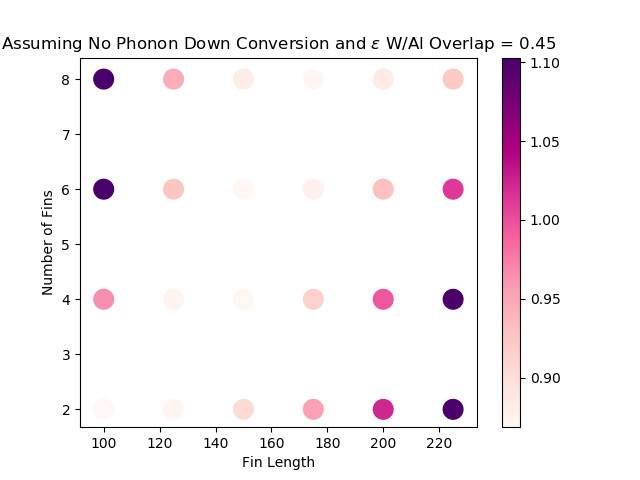

Active Surface Area  3.025072286269283e-05
Percent Active SA  0.003231872025898044
N tes  480
Base Resolution  0.9362153826217264
Rn  0.19999999999999998
Phonon Absorption Time  8.939016379839655e-05
Time ETF  6.666815483629353e-05
Active Surface Area  4.106293421169301e-05
Percent Active SA  0.004387007509950422
N tes  480
Base Resolution  0.8842053819503913
Rn  0.19999999999999998
Phonon Absorption Time  7.210955422769442e-05
Time ETF  6.666815483629355e-05


In [14]:
l_over = 20e-6 

n_fins = [2,4,6,8]
f, ax = plt.subplots(1)
for n in n_fins:
    sigma_e = []
    n_f = [n]*len(l_fins_mu)
    for l_f in l_fins: 
        tes = TES(tes_l, tes_w, l_over, n, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if n == 6 and l_f == 150e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF ", det._tes._tau_etf)
        if n == 4 and l_f == 125e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF ", det._tes._tau_etf)
    plt.scatter(l_fins_mu, n_f,  s=200, c=sigma_e, cmap = 'RdPu')
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlabel("Fin Length")
ax.set_ylabel("Number of Fins")
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


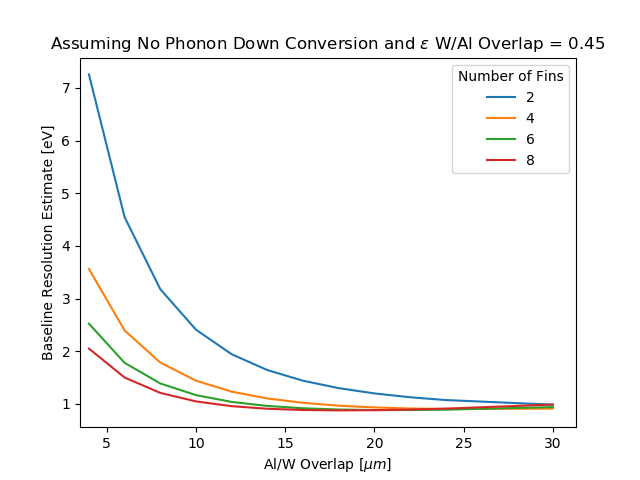

2  FINS
---------------------------------------------
-- overlap                 2e-05
-- TES length              0.0001
-- Percent Active SA       0.006177544127409111
-- N tes                   640
-- Fin Length              0.00015
-- Rn                      0.14999999999999997
-- QP Eff                  0.2537558457437834
-- Phonon Absorption Time  5.412148367610804e-05
-- Time ETF                7.233904574297789e-05
-- BASE RESOLUTION         1.1992870407245186
4  FINS
---------------------------------------------
-- overlap                 2e-05
-- TES length              0.0001
-- Percent Active SA       0.006013443737004838
-- N tes                   640
-- Fin Length              0.00015
-- Rn                      0.14999999999999997
-- QP Eff                  0.4324478762527232
-- Phonon Absorption Time  5.52683184346642e-05
-- Time ETF                7.233904574297787e-05
-- BASE RESOLUTION         0.9332103902750267
6  FINS
---------------------------------------------
INV

In [15]:
l_f = 150e-6
res_n = 150e-3
tes_l = 100e-6

f, ax = plt.subplots(1)
for n in n_fins:
    print(n, " FINS")
    print("---------------------------------------------")
    sigma_e = []
    for l_over in l_overlaps: 
        perim = tes_l*2 + 14e-6*2 - 6e-6*n
        overlap_p = n*l_over*2
        tes = TES(tes_l, tes_w, l_over, n, sigma, T_eq, res_n, 0.45, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_over == 20e-6:
            if overlap_p > perim:
                print("INVALID DESIGN!!!")
            print("-- overlap                ", l_over)
            print("-- TES length             ", det._tes._l)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- Fin Length             ", l_f)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- QP Eff                 ", det._qet._eQPabsb)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(n) )
plt.legend(title = "Number of Fins")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

8  FINS
--------------------------------------------------------------------


<IPython.core.display.Javascript object>


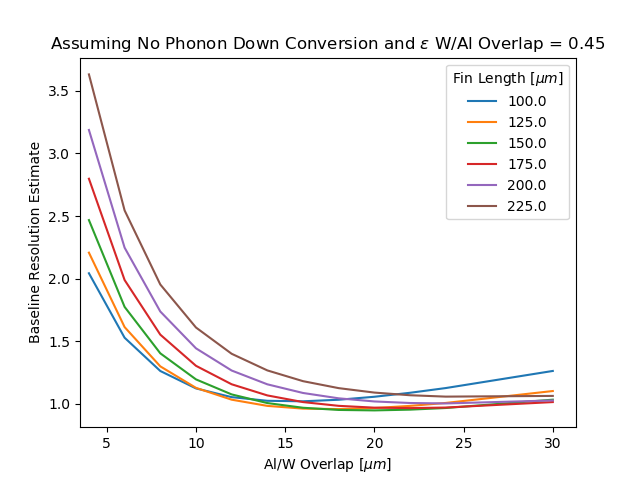

Ovelap                  1.4e-05
TES length              0.00014
Percent Active SA       0.008804094018687557
N tes                   896
Rn                      0.14999999999999994
Phonon Absorption Time  3.97489814349541e-05
Time ETF                7.23390457429779e-05
BASE RESOLUTION         1.0069217455908543
Ovelap                  2e-05
TES length              0.00014
Percent Active SA       0.008804094018687557
N tes                   896
Rn                      0.14999999999999994
Phonon Absorption Time  3.97489814349541e-05
Time ETF                7.233904574297789e-05
BASE RESOLUTION         0.9482765295771328


In [16]:
n_fin = 8
tes_l = 140e-6
print(n_fin, " FINS")
print("--------------------------------------------------------------------")
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 150e-6 and (l_over == 14e-6 or l_over == 20e-6):
            print("Ovelap                 ", l_over)
            print("TES length             ", det._tes._l)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

<IPython.core.display.Javascript object>


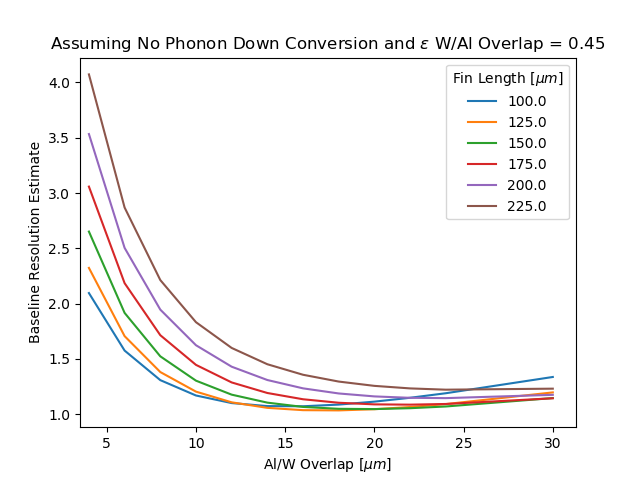

TES length  0.00014
Active Surface Area  8.880657533160164e-05
Percent Active SA  0.009487756303634383
N tes  1344
Base Resolution  1.2048716703591384
Rn  0.09999999999999996
Phonon Absorption Time  3.623435736856937e-05
Time ETF  8.544800207086225e-05


In [17]:
# Decrease Rn requirement to 100 mOhms? 
res_n = 100e-3 # want 100 mOhm 
f, ax = plt.subplots(1)
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.5, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 125e-6 and l_over == 10e-6:
            print("TES length ", det._tes._l)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF ", det._tes._tau_etf)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()